In [1]:
%%capture
import stata_setup, os
if os.name == 'nt':
    stata_setup.config('C:/Program Files/Stata17/','mp')
else:
    stata_setup.config('/usr/local/stata17','mp')

In [2]:
%%stata -qui

use "../data/data", clear
rename log_flesch_kincaid_grade_level FKG
quietly tabulate year, generate(y_)
quietly tabulate cluster, generate(c_)

local journals  ecm jpe qje res  //AER based category

local jel_imp a_imp b_imp c_imp  e_imp f_imp g_imp h_imp i_imp j_imp k_imp /// 
		l_imp m_imp n_imp o_imp p_imp q_imp r_imp y_imp z_imp // D JEL based case

## Lasso Regression

In [3]:
%%stata -qui -eret steret
#delimit ;
lasso linear FKG log_num_authors log_num_pages both_genders prop_women
        `journals' `jel_imp' y_2-y_20  c_2-c_215  jel_flag,
        lambda(0.004) nolog;
estimates store lasso;
#delimit cr

In [4]:
%stata ereturn display

------------------------------------------------------------------------------
         FKG | Coefficient
-------------+----------------------------------------------------------------
   .0023597s |
  prop_women |  -.0004395
         ecm |   .0214475
         res |   .0067892
       c_imp |   .0100399
       j_imp |  -.0002742
       l_imp |  -.0040454
       m_imp |  -.0058155
       p_imp |   .0102725
       z_imp |   .0082719
         y_2 |  -.0020283
        y_19 |   .0044503
         c_2 |   -.003098
         c_3 |   .0054662
         c_4 |   .1700485
        c_12 |   .0498898
        c_13 |   .1115755
        c_16 |   .0594836
        c_17 |  -.0158877
        c_19 |  -.0137163
        c_30 |   .0670438
        c_36 |  -.1482595
        c_38 |  -.0000305
        c_42 |   .0425364
        c_45 |  -.0157608
        c_50 |  -.1565083
        c_52 |  -.0043919
        c_54 |  -.0229245
        c_60 |   .0412154
        c_66 |   .0813038
        c_73 |   .1517602
        c_75 |   .00

In [5]:
%%stata -qui
#delimit ;
elasticnet linear FKG log_num_authors log_num_pages both_genders prop_women
        `journals' `jel_imp' y_2-y_20  c_2-c_215  jel_flag,
        alpha(0) lambda(1.4) nolog;
estimates store ridge;
#delimit cr

In [6]:
%stata lassocoef ridge lasso


--------------------------------------
                |   ridge     lasso   
----------------+---------------------
log_num_authors |     x    
  log_num_pages |     x         x     
   both_genders |     x    
     prop_women |     x         x     
            ecm |     x         x     
            jpe |     x    
            qje |     x    
            res |     x         x     
          a_imp |     x    
          b_imp |     x    
          c_imp |     x         x     
          e_imp |     x    
          f_imp |     x    
          g_imp |     x    
          h_imp |     x    
          i_imp |     x    
          j_imp |     x         x     
          k_imp |     x    
          l_imp |     x         x     
          m_imp |     x         x     
          n_imp |     x    
          o_imp |     x    
          p_imp |     x         x     
          q_imp |     x    
          r_imp |     x    
          z_imp |     x         x     
            y_2 |     x         x     
     

In [7]:
%%stata -qui
#delimit ;
lasso linear FKG log_num_authors log_num_pages both_genders prop_women
        `journals' `jel_imp' y_2-y_20  c_2-c_215  jel_flag,
        nolog folds(20) rseed(42);
estimates store cv;
#delimit cr

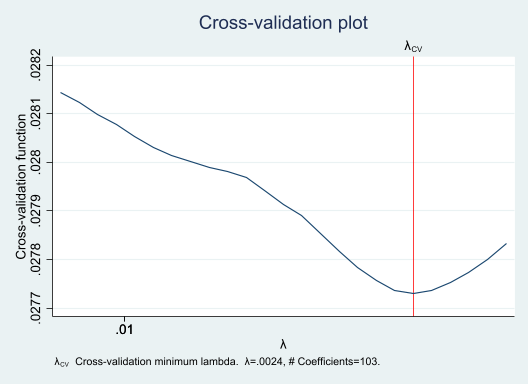

In [8]:
%stata cvplot, minmax

In [9]:
%%stata
#delimit ;
lasso linear FKG log_num_authors log_num_pages both_genders prop_women
        `journals' `jel_imp' y_2-y_20  c_2-c_215  jel_flag,
        nolog sel(cv,serule) folds(100) rseed(42);
#delimit cr


. #delimit ;
delimiter now ;
. lasso linear FKG log_num_authors log_num_pages both_genders prop_women
>         `journals' `jel_imp' y_2-y_20  c_2-c_215  jel_flag,
>         nolog sel(cv,serule) folds(100) rseed(42);

Lasso linear model                          No. of obs        =      4,988
                                            No. of covariates =        258
Selection: Cross-validation one s.e. rule   No. of CV folds   =        100

--------------------------------------------------------------------------
         |                                No. of      Out-of-      CV mean
         |                               nonzero       sample   prediction
      ID |     Description      lambda     coef.    R-squared        error
---------+----------------------------------------------------------------
     * 1 | selected lambda    .0137899         0      -0.0004     .0281436
       2 |    lambda after    .0125649         1       0.0005     .0281188
      25 |     last lambda    

Step 1

In [10]:
steret['e(allvars_sel)']

'log_num_pages prop_women ecm res c_imp j_imp l_imp m_imp p_imp z_imp y_2 y_19 c_2 c_3 c_4 c_12 c_13 c_16 c_17 c_19 c_30 c_36 c_38 c_42 c_45 c_50 c_52 c_54 c_60 c_66 c_73 c_75 c_86 c_94 c_98 c_102 c_108 c_139 c_145 c_151 c_165 c_166 c_180 c_183 c_186 c_187 c_190 c_193 c_194 c_198 c_209 c_215'

Step 2

In [11]:
steret['e(b_postselection)']

array([[ 0.01619588, -0.01271079,  0.02942181,  0.01834324,  0.01403871,
        -0.00966217, -0.00981967, -0.01423334,  0.03180837,  0.03040684,
        -0.01660127,  0.01998842, -0.0132574 ,  0.1700719 ,  0.33975728,
         0.26341346,  0.30595317,  0.22756923, -0.08819735, -0.15223669,
         0.13557891, -0.35171181, -0.14866494,  0.24885568, -0.10186321,
        -0.35858156, -0.16314212, -0.13988524,  0.15083912,  0.28664969,
         0.30666366,  0.09434489, -0.32964873, -0.15622047,  0.23506107,
         0.11780536, -0.22804017, -0.26717355,  0.21081936, -0.27031132,
         0.30174348,  0.21232284, -0.29287214, -0.29956206,  0.29179373,
         0.17902457, -0.2273103 , -0.19565426,  0.1993974 ,  0.18060527,
         0.18037651,  0.19166047,  2.67286643]])